In [2]:
from network import *
import pickle

# Hyper Parameters
num_epochs = 18
batch_size = 100
learning_rate = 0.001

#CIFAR-10

train_dataset = dsets.CIFAR10(root = "./datasets/",train = True,transform = transforms.ToTensor(),download= True)
test_dataset = dsets.CIFAR10(root = "./datasets/",train = False,transform = transforms.ToTensor(),download= True)


#Data Loader

train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size,shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size,shuffle = False)



cnn = CNN0()
#xavier initalize
nn.init.xavier_normal(cnn.layer1[0].weight)
# nn.init.xavier_normal(cnn.layer1[0].bias)


cnn.cuda()




criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(),lr = learning_rate)

train_acc_container,test_acc_container = trainning(
    net = cnn, 
    train_loader = train_loader,
    test_loader = test_loader, 
    criterion = criterion,
    optimizer = optimizer, 
    num_epochs = num_epochs,
)

with open("CNN0_result.dat","wb") as f:
    pickle.dump([train_acc_container,test_acc_container],f)
    print("CNN0 data save")

Files already downloaded and verified
Files already downloaded and verified
Epoch [1/18], Train: 47.8400 Test: 47.1100
Epoch [1/18], Train: 54.6820 Test: 53.4900
Epoch [1/18], Train: 58.6420 Test: 57.3900
Epoch [1/18], Train: 61.3280 Test: 60.1000
Epoch [1/18], Train: 63.8680 Test: 61.9700
Epoch [2/18], Train: 64.5640 Test: 61.9900
Epoch [2/18], Train: 63.5960 Test: 61.1200
Epoch [2/18], Train: 69.0100 Test: 65.7600
Epoch [2/18], Train: 68.6020 Test: 65.4500
Epoch [2/18], Train: 68.1380 Test: 64.8700
Epoch [3/18], Train: 70.7640 Test: 66.8700
Epoch [3/18], Train: 69.1760 Test: 65.6500
Epoch [3/18], Train: 70.0040 Test: 65.6300
Epoch [3/18], Train: 73.5300 Test: 68.4200
Epoch [3/18], Train: 72.3560 Test: 67.0400
Epoch [4/18], Train: 73.7880 Test: 68.3600
Epoch [4/18], Train: 73.7500 Test: 67.7000
Epoch [4/18], Train: 74.2800 Test: 68.5200
Epoch [4/18], Train: 73.8000 Test: 67.5300
Epoch [4/18], Train: 74.9800 Test: 68.3900
Epoch [5/18], Train: 76.9480 Test: 69.8700
Epoch [5/18], Train: 

Parameter containing:
(0 ,0 ,.,.) = 
 -0.1256 -0.1316  0.0191
 -0.0852  0.0714  0.0363
  0.0854 -0.0934  0.0182

(0 ,1 ,.,.) = 
 -0.0762  0.0090 -0.0664
 -0.0074 -0.0456  0.0301
  0.0322 -0.0550  0.0078

(0 ,2 ,.,.) = 
  0.0676 -0.0631  0.0648
  0.0730 -0.0106  0.1008
 -0.0662  0.0779 -0.0203

(1 ,0 ,.,.) = 
  0.0073  0.0441 -0.0440
  0.0186 -0.1350 -0.1002
  0.0357 -0.0257  0.0685

(1 ,1 ,.,.) = 
 -0.1115  0.0680  0.0082
  0.0972 -0.1246  0.0744
  0.0743  0.0476 -0.0614

(1 ,2 ,.,.) = 
 -0.0526 -0.0441  0.0110
 -0.0115  0.0632  0.0505
  0.1335 -0.0768 -0.0473

(2 ,0 ,.,.) = 
  0.0012 -0.0599 -0.0051
  0.1039 -0.0989 -0.0190
  0.1698 -0.0419  0.0108

(2 ,1 ,.,.) = 
  0.2410  0.0702  0.0150
  0.0525 -0.0404 -0.0234
  0.0855  0.0752 -0.0946

(2 ,2 ,.,.) = 
  0.0470 -0.0746  0.0536
  0.0189  0.0041 -0.0605
  0.0030  0.0982  0.0140

(3 ,0 ,.,.) = 
  0.0513  0.0660  0.0433
  0.0834  0.0245 -0.2085
  0.0532 -0.0533  0.0162

(3 ,1 ,.,.) = 
  0.0841  0.0258  0.0303
 -0.0878  0.1100  0.0283
  0

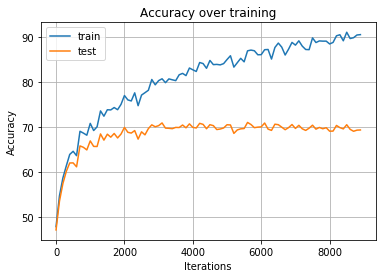

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.arange(len(train_acc_container))*100,np.array(train_acc_container))
plt.plot(np.arange(len(test_acc_container))*100,np.array(test_acc_container))
plt.legend(["train","test"])
plt.grid()
plt.title("Accuracy over training")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.savefig("CNN0.jpg")
plt.show()